In [27]:
%run setup.ipynb

No of images in training set: 835
No of images in validation set: 104
No of images in test set: 105
No of images in feeder set: 15079


In [2]:


model, modelinfo = load_function("fine_base.tar")
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## Base model (Adam-optimiser, lr = 0.0005, 50 epochs, no finetuning, no augmentation)

In [ ]:
basemodel, baseinfo = load_function("base_lr0.0005.tar")
basemodel.eval()
print("Test accuracy: " + str(baseinfo["test_acc"]))

Test accuracy: 97.14285714285714


In [10]:
print_stats(baseinfo)

Lowest loss was 0.0922 at epoch 49
Highest accuracy was 1.0000 at epoch 26
Number of epochs run  50
Batch size was  16
Optimizer used:  Adam with lr=0.0005
Overall accuracy on test data 97.1429


In [9]:
base_truel, base_predl = labels_and_predictions(dataloader_test, basemodel, device)
base_truelfeed, base_predlfeed = labels_and_predictions(dataloader_feeder, basemodel, device)

In [12]:
save_function("base_lr0.0005.tar", basemodel, baseinfo, extra_info={"feeder_acc":accuracy(base_truelfeed,base_predlfeed)})

### Base model stats on test data

In [14]:
classification_report(base_truel,base_predl)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        15\n           1       0.94      1.00      0.97        15\n           2       0.88      1.00      0.94        15\n           3       1.00      0.93      0.97        15\n           4       1.00      0.87      0.93        15\n           5       1.00      1.00      1.00        15\n           6       1.00      1.00      1.00        15\n\n    accuracy                           0.97       105\n   macro avg       0.97      0.97      0.97       105\nweighted avg       0.97      0.97      0.97       105\n'

In [31]:
print("'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        15\n           1       0.94      1.00      0.97        15\n           2       0.88      1.00      0.94        15\n           3       1.00      0.93      0.97        15\n           4       1.00      0.87      0.93        15\n           5       1.00      1.00      1.00        15\n           6       1.00      1.00      1.00        15\n\n    accuracy                           0.97       105\n   macro avg       0.97      0.97      0.97       105\nweighted avg       0.97      0.97      0.97       105\n'")

'              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       0.88      1.00      0.94        15
           3       1.00      0.93      0.97        15
           4       1.00      0.87      0.93        15
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        15

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105
'


[[15  0  0  0  0  0  0]
 [ 0 15  0  1  0  0  0]
 [ 0  0 15  0  2  0  0]
 [ 0  0  0 14  0  0  0]
 [ 0  0  0  0 13  0  0]
 [ 0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0 15]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

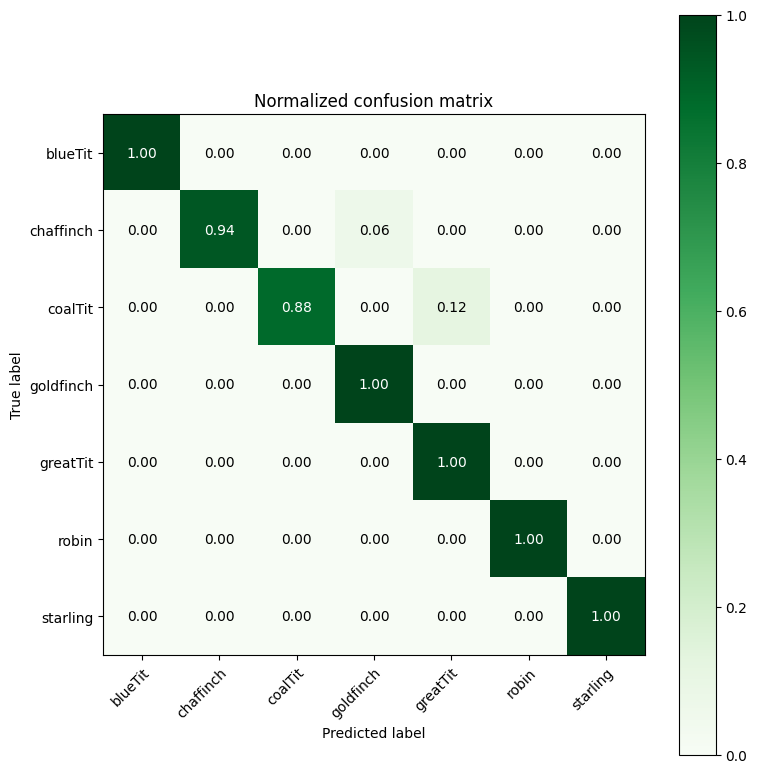

In [16]:
plot_confusion_matrix(base_predl, base_truel, class_labels, normalize=True)

### Basemodel stats on feeder data

In [11]:
print("Feeder accuracy: " + str(accuracy(base_truelfeed,base_predlfeed)))

Feeder accuracy: 39.98275747728629


In [29]:
classification_report(base_truelfeed, base_predlfeed)

'              precision    recall  f1-score   support\n\n           0       0.25      0.04      0.07      2078\n           1       0.51      0.33      0.40      3552\n           2       0.38      0.15      0.21      1846\n           3       0.39      0.93      0.54      2000\n           4       0.41      0.42      0.42      2033\n           5       0.44      0.31      0.37      1428\n           6       0.36      0.62      0.45      2142\n\n    accuracy                           0.40     15079\n   macro avg       0.39      0.40      0.35     15079\nweighted avg       0.40      0.40      0.36     15079\n'

In [30]:
print("'              precision    recall  f1-score   support\n\n           0       0.25      0.04      0.07      2078\n           1       0.51      0.33      0.40      3552\n           2       0.38      0.15      0.21      1846\n           3       0.39      0.93      0.54      2000\n           4       0.41      0.42      0.42      2033\n           5       0.44      0.31      0.37      1428\n           6       0.36      0.62      0.45      2142\n\n    accuracy                           0.40     15079\n   macro avg       0.39      0.40      0.35     15079\nweighted avg       0.40      0.40      0.36     15079\n'")

'              precision    recall  f1-score   support

           0       0.25      0.04      0.07      2078
           1       0.51      0.33      0.40      3552
           2       0.38      0.15      0.21      1846
           3       0.39      0.93      0.54      2000
           4       0.41      0.42      0.42      2033
           5       0.44      0.31      0.37      1428
           6       0.36      0.62      0.45      2142

    accuracy                           0.40     15079
   macro avg       0.39      0.40      0.35     15079
weighted avg       0.40      0.40      0.36     15079
'


[[  89   98   90    1   37    3   33]
 [ 281 1160  202   54  207  112  279]
 [  61  136  274   15  101    0  130]
 [ 316 1150  919 1860  328   95  160]
 [ 719  151  233   36  864   55   64]
 [  28  253   45   34   69  446  140]
 [ 584  604   83    0  427  717 1336]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

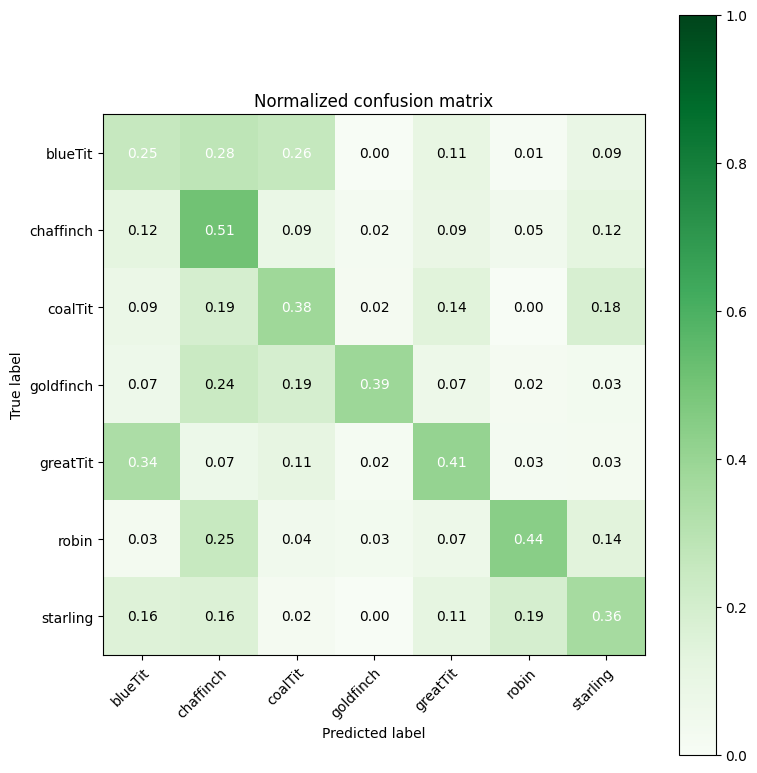

In [28]:
plot_confusion_matrix(base_predlfeed, base_truelfeed, class_labels, normalize=True)